<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDKit-Butina" data-toc-modified-id="RDKit-Butina-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDKit Butina</a></span></li><li><span><a href="#Sklearn层次聚类" data-toc-modified-id="Sklearn层次聚类-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sklearn层次聚类</a></span></li><li><span><a href="#scipy层次聚类" data-toc-modified-id="scipy层次聚类-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>scipy层次聚类</a></span></li><li><span><a href="#根据聚类结果划分训练集测试" data-toc-modified-id="根据聚类结果划分训练集测试-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>根据聚类结果划分训练集测试</a></span><ul class="toc-item"><li><span><a href="#Class0整体" data-toc-modified-id="Class0整体-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Class0整体</a></span></li><li><span><a href="#Class1~3" data-toc-modified-id="Class1~3-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Class1~3</a></span></li></ul></li></ul></div>

# RDKit Butina

In [9]:
def ClusterFps(fps,cutoff=0.2):
    from rdkit import DataStructs
    from rdkit.ML.Cluster import Butina

    # first generate the distance matrix:
    dists = []
    nfps = len(fps)
    for i in range(1,nfps):
        sims = DataStructs.BulkTanimotoSimilarity(fps[i],fps[:i])
        dists.extend([1-x for x in sims])

    # now cluster the data:
    cs = Butina.ClusterData(dists,nfps,cutoff,isDistData=True)
    return cs

In [25]:
from rdkit import Chem
from rdkit.Chem import AllChem
ms = Chem.SDMolSupplier("./data/KI_IC50_10To50/2112quan/kiquan1181.sdf")
# fps = [AllChem.GetMorganFingerprintAsBitVect(x,2,1024) for x in ms]
clusters=ClusterFps(fps,cutoff=0.5)#Tanimoto系数>0.7（距离小于0.3）才成为一类
print(len(clusters))
low = 0
for i in clusters:
    if len(i)<3:
        low += 1
low

51


18

# Sklearn层次聚类

In [ ]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem,Draw
from rdkit.Chem.Draw import IPythonConsole,DrawingOptions
Chem.Draw.IPythonConsole.ipython_useSVG = True

In [95]:
ms = Chem.SDMolSupplier("./data/KI_IC50_10To50/2112quan/kiquan1181.sdf")
fps =[AllChem.GetMorganFingerprintAsBitVect(x,2,nBits=1024) for x in ms]
hot_data = np.eye(len(fps))
for i in range(len(fps)):
    for j in range(i+1,len(fps)):
        hot_data[i,j] = DataStructs.FingerprintSimilarity(fps[i],fps[j])
        hot_data[j,i] = hot_data[i,j]
print(len(fps))

In [128]:
from sklearn.cluster import AgglomerativeClustering
i = 2#int(len(fps)*0.1)
clst=AgglomerativeClustering(n_clusters=i,linkage="average",affinity='precomputed')
pre = clst.fit_predict(1-hot_data)
low = 0
for i in range(i):
    if sum(pre==i)<2:
        low += 1
low

0

C:\Anaconda2\envs\python3\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:183: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


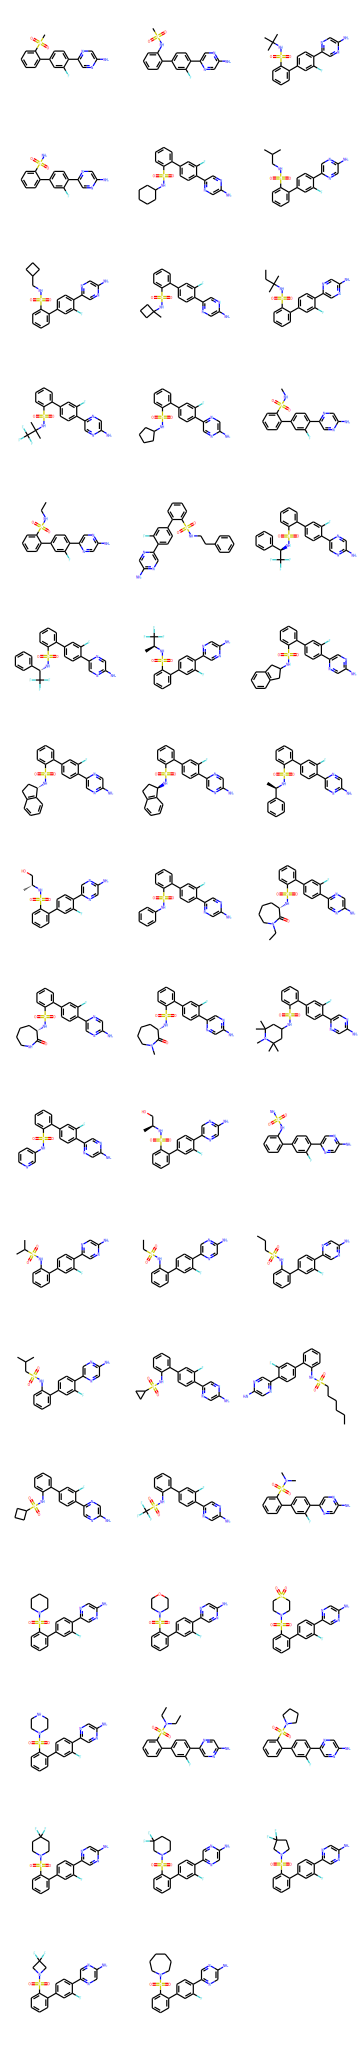

In [130]:
#查看某一类的结构
msi = [ms[int(i)] for i in np.where(pre==0)[0]]
Draw.MolsToGridImage(msi)

In [129]:
sum(pre==0)

996

# scipy层次聚类

In [1]:
#import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem,Draw
from rdkit.Chem.Draw import IPythonConsole,DrawingOptions
Chem.Draw.IPythonConsole.ipython_useSVG = True
#from sklearn import decomposition as skldec #用于主成分分析降维的包


In [3]:
ms = Chem.SDMolSupplier("C:/OneDrive/Jupyter_notebook/regression_new/data/spla2_data_regression_329.sdf")
fps = [list(AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024,useChirality=True).ToBitString()) for m in ms]
columns = ["ecfp_" + str(i) for i in range(1,len(fps[0])+1)]
data = pd.DataFrame(fps,columns=columns,dtype=np.int8)

In [7]:
data = pd.read_csv("C:/Users/buct408a/Desktop/cal_smarts_ecfp_result.csv")

In [8]:
data.head()

,ecfp_1,ecfp_2,ecfp_3,ecfp_4,ecfp_5,ecfp_6,ecfp_7,ecfp_8,ecfp_9,ecfp_10,ecfp_11,ecfp_12,ecfp_13
0,1,1,0,0,0,1,0,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,1,1,1,0,0,0,0
3,1,1,0,0,0,0,1,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [10]:
Z = hierarchy.linkage(data, method ='average',metric='jaccard',optimal_ordering=True)

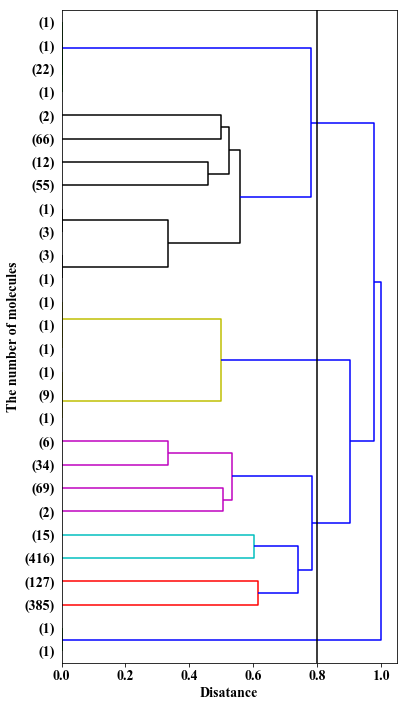

In [20]:
plt.rcParams['font.family'] = ['Times New Roman']# 设置字体
plt.rcParams['font.size'] = 14# 设置字体
fig = plt.figure(facecolor="w",figsize=(6,12))
dn = hierarchy.dendrogram(Z,orientation="right",truncate_mode="level",p=5,labels=["(1)"]*len(data),
                          leaf_font_size=14)
#plt.savefig("./data/KI_IC50_10To50/2112/linkage.png", dpi=300,bbox_inches="tight")
plt.xlabel("Disatance")
plt.ylabel("The number of molecules")
plt.vlines(0.8,0,30000)
plt.show()

In [273]:
label = cluster.hierarchy.cut_tree(Z,height=0.7)
label = label.reshape(label.size,)
low=0
for i in range(max(label)):
    if sum(label==i)<=2:
        low += 1
print(low,max(label))

1 11


In [24]:
label

array([ 0,  0,  0, ...,  3, 61, 61])

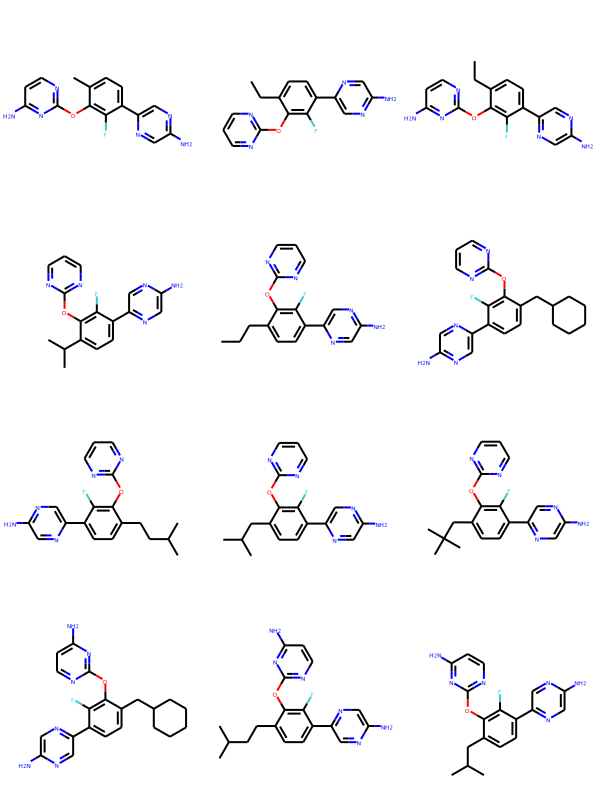

In [28]:
#查看某一类的结构
msi = [ms[int(i)] for i in np.where(label==60)[0]]
Draw.MolsToGridImage(msi)

# 根据聚类结果划分训练集测试

In [2]:
#计算1256全体数据描述符
ms = Chem.SDMolSupplier("./data/KI_IC50_10To50/2112quan/kiquan1256.sdf")
fps = [list(AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024,useChirality=True).ToBitString()) for m in ms]
columns = ["ecfp_" + str(i) for i in range(1,len(fps[0])+1)]
data = pd.DataFrame(fps,columns=columns,dtype=np.int8)
classinfo = pd.read_csv("./data/KI_IC50_10To50/2112quan/class.csv")

## Class0整体

In [161]:
#提总数据
data0 = data.loc[classinfo.Noise != "Yes",:].reset_index(drop=True)
classinfo0 = classinfo.loc[classinfo.Noise != "Yes",:].reset_index(drop=True)
ms0 = [ms[i] for i in classinfo[classinfo.Noise != "Yes"].index]

In [134]:
#聚类
Z = hierarchy.linkage(data0, method ='average',metric='jaccard',optimal_ordering=True)

56 155


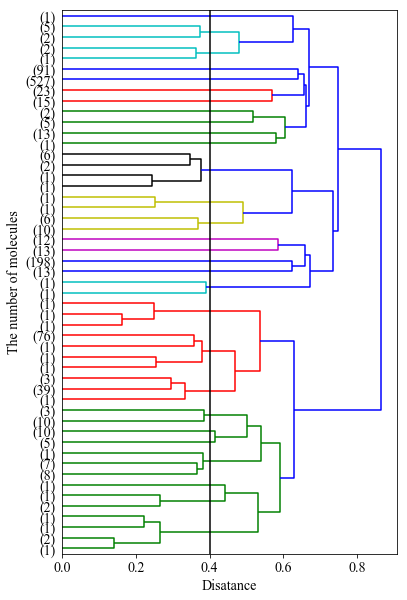

In [135]:
#剪切树
threshould = 0.4
label = hierarchy.cut_tree(Z,height=threshould)
label = label.reshape(label.size,)
low=0
for i in range(max(label)):
    if sum(label==i)<=2:
        low += 1
print(low,max(label))
plt.rcParams['font.family'] = ['Times New Roman']# 设置字体
plt.rcParams['font.size'] = 14# 设置字体
fig = plt.figure(facecolor="w",figsize=(6,10))
dn = hierarchy.dendrogram(Z,orientation="right",truncate_mode="level",p=5,
                          leaf_font_size=14,labels=["(1)"]*len(fps))
#plt.savefig("./data/KI_IC50_10To50/2112/linkage.png", dpi=300,bbox_inches="tight")
plt.xlabel("Disatance")
plt.ylabel("The number of molecules")
plt.vlines(threshould,0,3000)
plt.show()

In [87]:
#cluster结果合并到classinfo0，并排序
classinfo0["cluster0"] = pd.Series(label)
classinfo0.sort_values(by=["cluster0","No_2754"],inplace=True)
classinfo0.reset_index(drop=True,inplace=True)

In [91]:
#生成Tr、Te列表
TrTe = []
for i in range(max(label)+1):
    num = sum(classinfo0.loc[:,"cluster0"] ==i)
    TrTe = TrTe + ["Tr","Te","Tr"]*(num//3)+["Tr"]*(num%3)
classinfo0["TrTe0"] = pd.Series(TrTe)

In [92]:
trpKi = classinfo0.loc[classinfo0.TrTe0 =="Tr","pKi"]
tepKi = classinfo0.loc[classinfo0.TrTe0 =="Te","pKi"]
print("\033[31mTr/Te:个数/最高/最低\033[0m")
print(f"Tr:{len(trpKi)}/{trpKi.max()}/{trpKi.min()},")
print(f"Te:{len(tepKi)}/{tepKi.max()}/{trpKi.min()},")

Tr/Te:个数/最高/最低
Tr:781/9.397940009/5.602059991,
Te:351/9.397940009/5.602059991,


In [98]:
classinfo0.sort_values("No_2754",inplace=True)
classinfo0.reset_index(drop=True,inplace=True)
classinfo0.to_csv("./data/KI_IC50_10To50/2112quan/class0TrTeIndex.csv",index=False)

In [108]:
input_file = "./data/KI_IC50_10To50/2112quan/KiQuanRDKit.csv"
init_df = pd.read_csv(input_file,dtype=np.str)
tr_df =init_df.loc[classinfo0.loc[:,"TrTe0"]=="Tr",:]
tr_df.to_csv(input_file[:-4]+"_0Train.csv",index=False)

te_df =init_df.loc[classinfo0.loc[:,"TrTe0"]=="Te",:]
te_df.to_csv(input_file[:-4]+"_0Test.csv",index=False)

## Class1~3

In [18]:
#提总数据
classi=2#提取类别
data0 = data.loc[classinfo.Noise != "Yes",:].reset_index(drop=True)
classinfo0 = classinfo.loc[classinfo.Noise != "Yes",:].reset_index(drop=True)

datai = data0.loc[classinfo0.loc[:,"class"] == classi,:].reset_index(drop=True)
classinfoi = classinfo0.loc[classinfo0.loc[:,"class"] == classi,:].reset_index(drop=True)
msi = [ms[i] for i in classinfo.loc[classinfo.Noise != "Yes","class"].index[classinfo.loc[classinfo.Noise != "Yes","class"]==classi]]

In [19]:
#聚类
Z = hierarchy.linkage(datai, method ='average',metric='jaccard',optimal_ordering=True)

6 38


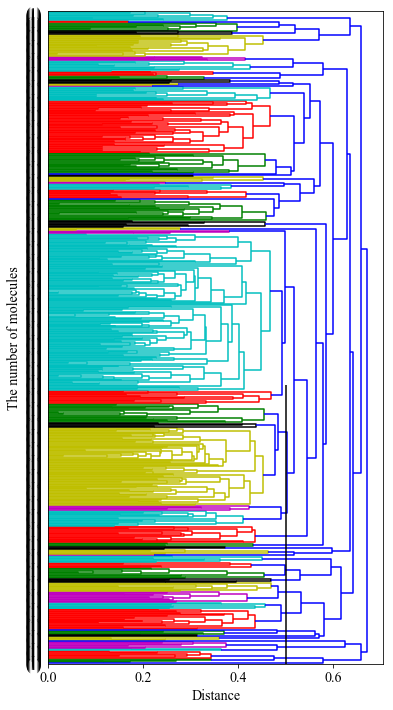

In [20]:
#剪切树
threshould = 0.5
label = hierarchy.cut_tree(Z,height=threshould)
label = label.reshape(label.size,)
low=0
for i in range(max(label)+1):
    if sum(label==i)<=2:
        low += 1
print(low,max(label)+1)
plt.rcParams['font.family'] = ['Times New Roman']# 设置字体
plt.rcParams['font.size'] = 14# 设置字体
fig = plt.figure(facecolor="w",figsize=(6,12))
dn = hierarchy.dendrogram(Z,orientation="right",truncate_mode="level",p=0,
                          leaf_font_size=14,labels=["(1)"]*len(fps))
#plt.savefig("./data/KI_IC50_10To50/2112/linkage.png", dpi=300,bbox_inches="tight")
plt.xlabel("Distance")
plt.ylabel("The number of molecules")
plt.vlines(threshould,0,3000)
plt.show()

In [21]:
#cluster结果合并到classinfoi，并排序
classinfoi[f"cluster{classi}"] = pd.Series(label)
classinfoi.sort_values(by=[f"cluster{classi}","No_2754"],inplace=True)
classinfoi.reset_index(drop=True,inplace=True)

In [22]:
#生成Tr、Te列表
TrTe = []
for i in range(max(label)+1):
    num = sum(classinfoi.loc[:,f"cluster{classi}"] ==i)
    TrTe = TrTe + ["Tr","Te","Tr"]*(num//3)+["Tr"]*(num%3)
classinfoi["TrTe"] = pd.Series(TrTe)
trpKi = classinfoi.loc[classinfoi.TrTe =="Tr","pKi"]
tepKi = classinfoi.loc[classinfoi.TrTe =="Te","pKi"]
print("\033[31mTr/Te:个数/最高/最低\033[0m")
print(f"Tr:{len(trpKi)}/{trpKi.max()}/{trpKi.min()},")
print(f"Te:{len(tepKi)}/{tepKi.max()}/{trpKi.min()},")

Tr/Te:个数/最高/最低
Tr:482/9.397940009/5.602059991,
Te:219/9.397940009/5.602059991,


In [23]:
#保存index
classinfoi.sort_values("No_2754",inplace=True)
classinfoi.reset_index(drop=True,inplace=True)
classinfoi.to_csv(f"./data/KI_IC50_10To50/2112quan/class{classi}TrTeIndex.csv",index=False)

In [24]:
#划分训练测试
input_file = "./data/KI_IC50_10To50/2112quan/KiQuanCORINA.csv"
init_df0 = pd.read_csv(input_file,dtype=np.str)
init_df = init_df0.loc[classinfo0.loc[:,"class"] == classi,:].reset_index(drop=True)
tr_df =init_df.loc[classinfoi.loc[:,"TrTe"]=="Tr",:]
tr_df.to_csv(input_file[:-4]+"_2Train.csv",index=False)
te_df =init_df.loc[classinfoi.loc[:,"TrTe"]=="Te",:]
te_df.to_csv(input_file[:-4]+"_2Test.csv",index=False)
#划分训练测试
input_file = "./data/KI_IC50_10To50/2112quan/KiQuanRDKit.csv"
init_df0 = pd.read_csv(input_file,dtype=np.str)
init_df = init_df0.loc[classinfo0.loc[:,"class"] == classi,:].reset_index(drop=True)
tr_df =init_df.loc[classinfoi.loc[:,"TrTe"]=="Tr",:]
tr_df.to_csv(input_file[:-4]+"_2Train.csv",index=False)
te_df =init_df.loc[classinfoi.loc[:,"TrTe"]=="Te",:]
te_df.to_csv(input_file[:-4]+"_2Test.csv",index=False)
